<a href="https://colab.research.google.com/github/bhanu-nattala/Machine-Learning/blob/master/Visualizing_and_Predicting_Covid_Cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
covid_data = pd.read_csv('owid-covid-data.csv',sep=',')
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
covid_data_countrydate = covid_data[covid_data['new_cases']>0]
covid_data_countrydate = covid_data_countrydate.groupby(['date','location']).sum().reset_index()

fig = px.choropleth(covid_data_countrydate, 
                    locations="location", 
                    locationmode = "country names",
                    color="new_cases", 
                    hover_name="location", 
                    animation_frame="date"
                   )

fig.update_layout(
    title_text = 'Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()

In [ ]:
#selecting only Asia Region
covid_data1=covid_data.loc[covid_data['continent'] == 'Asia']

#grouping by data & location whose corona cases> 0
covid = covid_data1.groupby(['location', 'date']).max().reset_index().sort_values('date', ascending=False)
covid = covid.drop_duplicates(subset = ['location'])
covid = covid[covid['total_cases']>0]

#visualizing Corona Cases on October 13 in Asia Region
fig = go.Figure(data=go.Choropleth(
    locations = covid['location'],
    locationmode = 'country names',
    z = covid['new_cases'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5
))

fig.update_layout(
    title_text = 'New cases As of October 13 : Asia',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

In [ ]:
df_no_india = covid[covid['location'] != 'India']
fig = go.Figure(data=go.Choropleth(
    locations = df_no_india['location'],
    locationmode = 'country names',
    z = df_no_india['new_cases'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5
))

fig.update_layout(
    title_text = 'New cases As of October 13 : Asia(Excluding India)',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

In [ ]:
df11=covid_data.loc[covid_data['location'] == 'Maldives']
bar_data = df11.groupby(['date'])['new_cases'].sum().reset_index().sort_values('date', ascending=True)

fig = px.bar(bar_data, x="date", y="new_cases", text = 'new_cases', orientation='v', height=600,
             title='Confirmed Cases In Maldives Till October 13')
fig.show()

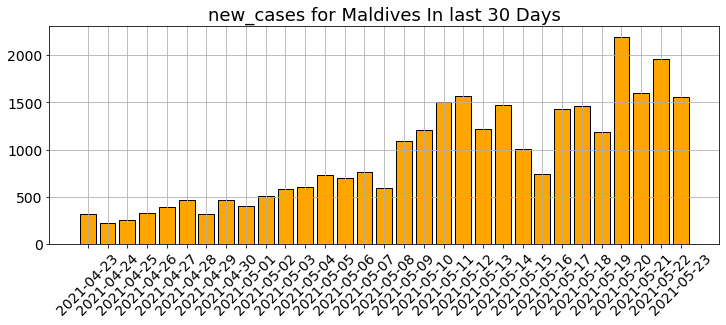

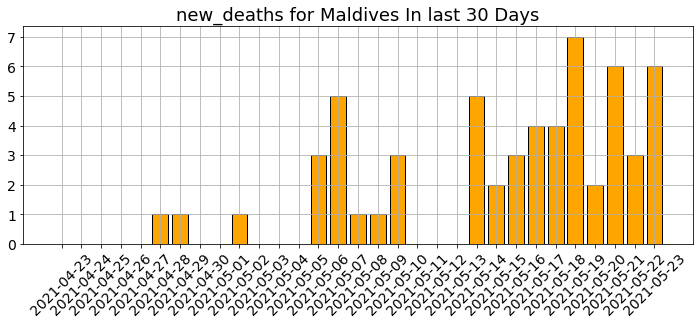

In [ ]:
def plot_var(var='new_deaths',
             location='Maldives'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(location)==str, "Expected string as the state name"
    
    y = df11[df11['location']==location][var][-31:]
    x = df11[df11['location']==location]['date'][-31:]
    plt.figure(figsize=(12,4))
    plt.title("{} for {} In last 30 Days".format(var,location),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

plot_var('new_cases')
plot_var('new_deaths')

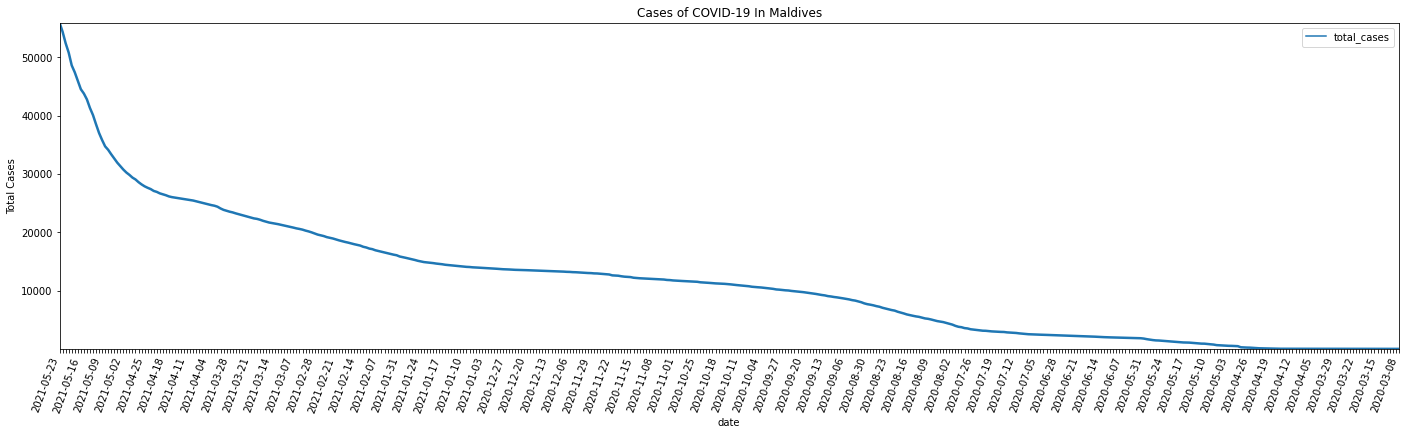

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
covid_data = pd.read_csv('owid-covid-data.csv',sep=',')
df=covid_data.loc[covid_data['location'] == 'Maldives']
df = df[['continent','location', 'date','new_cases','new_deaths','total_cases','total_deaths']]
df.fillna(0)
covidByDay =df.groupby(['date'])[['total_cases']].sum().sort_values('date', ascending=False)

labels = covidByDay.index.get_level_values(0).values
plt.figure(figsize=(24, 6))
ax = sns.lineplot(data=covidByDay, palette="tab10", linewidth=2.5)
ax.set_xticklabels(labels, rotation=70, horizontalalignment='right')
ax.set_ylabel('Total Cases')
ax.set_title('Cases of COVID-19 In Maldives')
ax.margins(0)

n = 7  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax

In [ ]:
# only work with a limited amount of data
df = df[df['total_cases'] > 10000]

ar=list(range(1,242))
df.insert(0,"SN",ar,True)

In [ ]:
#PREPARING DATASET
x1 = np.array(df["SN"]).reshape(-1,1)
y = np.array(df['total_cases']).reshape(-1,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

print('--'*15,end ='');print('polynomial model training',end ='');print('--'*10)

for i in range(1,6):
    polyfet = PolynomialFeatures(degree=i)
    xa = polyfet.fit_transform(x1)
    model = linear_model.LinearRegression()
    model.fit(xa,y)
    accuracy = model.score(xa,y)
    print('accuracy(R2) with degree_{} is -->  {}%'.format(i , round(accuracy*100,3)))
print('--'*45)

------------------------------polynomial model training--------------------
accuracy(R2) with degree_1 is -->  74.706%
accuracy(R2) with degree_2 is -->  90.876%
accuracy(R2) with degree_3 is -->  95.359%
accuracy(R2) with degree_4 is -->  96.988%
accuracy(R2) with degree_5 is -->  98.73%
------------------------------------------------------------------------------------------


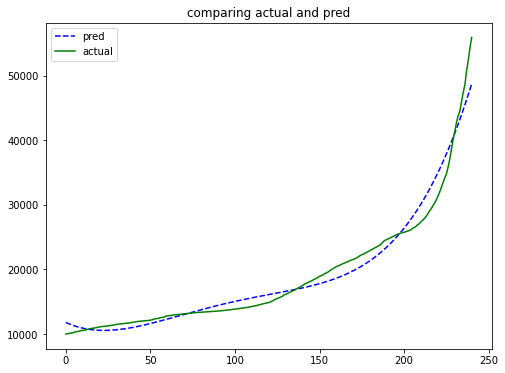

In [ ]:
polyfet = PolynomialFeatures(degree=4) #you can change degree
xa = polyfet.fit_transform(x1)
model = linear_model.LinearRegression()
model.fit(xa,y)
yp = model.predict(xa)
yact = np.array(df['total_cases'])#.reshape(-1,1)

plt.figure(figsize=(8, 6)) 
plt.plot(yp,"--b")
plt.plot(yact,"-g")
plt.legend(['pred', 'actual'])
plt.xticks()
# plt.yticks([])
plt.title("comparing actual and pred", fontdict=None, loc='center')
plt.show()

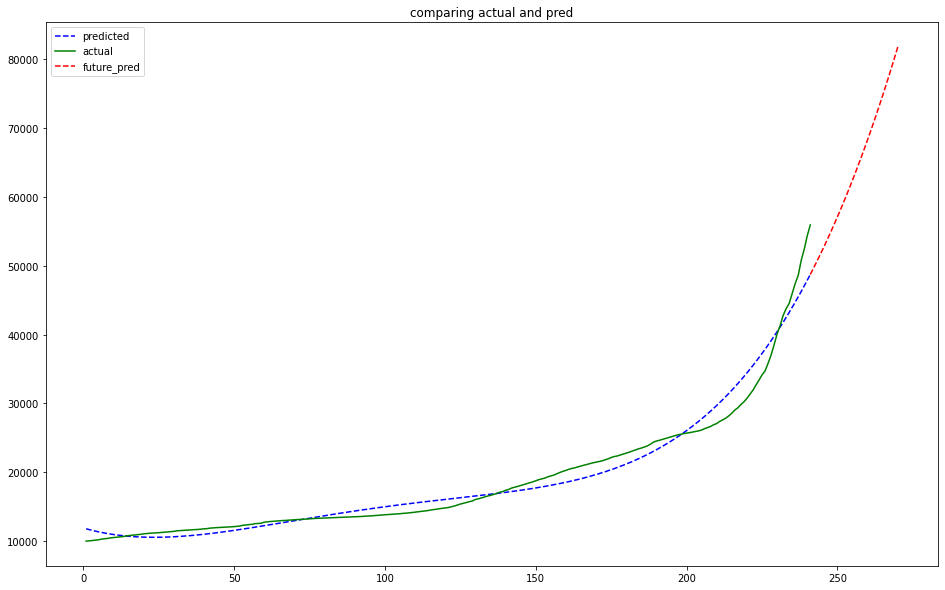

In [ ]:
x_fut = np.arange(30).reshape(-1,1)
xf = x_fut+x1[-1:]
y_fut = (model.predict(polyfet.transform(xf))).astype(int)

plt.figure(figsize=(16, 10)) 
plt.plot(x1,yp,"--b")
plt.plot(x1,yact,"-g")
plt.plot(xf,y_fut,"--r")
plt.legend(['predicted', 'actual',"future_pred"])
plt.xticks()

plt.title("comparing actual and pred", fontdict=None, loc='center')
plt.show()